In [22]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)
city_data
# Combine the data into a single dataset

city_ride_data = pd.merge(ride_data, city_data, on = 'city', how = 'outer')

# Display the data table for preview
city_ride_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/18 10:14,13.83,5.740000e+12,5,Urban
1,Lake Jonathanshire,4/7/18 20:51,31.25,4.440000e+12,5,Urban
2,Lake Jonathanshire,3/9/18 23:45,19.89,2.390000e+12,5,Urban
3,Lake Jonathanshire,4/7/18 18:09,24.28,7.800000e+12,5,Urban
4,Lake Jonathanshire,1/2/18 14:14,13.89,4.240000e+11,5,Urban


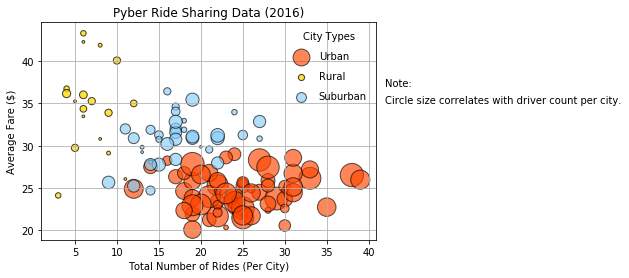

In [28]:
# Obtain the x and y coordinates for each of the three city types
urban_df = city_ride_data.loc[city_ride_data['type']=='Urban',:]
suburban_df = city_ride_data.loc[city_ride_data['type']=='Suburban',:]
rural_df = city_ride_data.loc[city_ride_data['type']=='Rural',:]

x_urban_df = urban_df.groupby('city')['ride_id'].count().to_frame().reset_index()
x_urban = x_urban_df['ride_id']
y_urban_df = urban_df.groupby('city')['fare'].mean().to_frame().reset_index()
y_urban = y_urban_df['fare']
area_urban = city_data.loc[city_data['type']=='Urban','driver_count']
x_suburban_df = suburban_df.groupby('city')['ride_id'].count().to_frame().reset_index()
x_suburban = x_suburban_df['ride_id']
y_suburban_df = suburban_df.groupby('city')['fare'].mean().to_frame().reset_index()
y_suburban = y_suburban_df['fare']
area_suburban = city_data.loc[city_data['type']=='Suburban','driver_count']

x_rural_df = rural_df.groupby('city')['ride_id'].count().to_frame().reset_index()
x_rural = x_rural_df['ride_id']
y_rural_df = rural_df.groupby('city')['fare'].mean().to_frame().reset_index()
y_rural = y_rural_df['fare']
area_rural = city_data.loc[city_data['type']=='Rural','driver_count']

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s=area_urban*7.5, color = 'orangered', alpha = 0.65, edgecolor = 'black', label = 'Urban')
plt.scatter(x_rural, y_rural, s=area_rural*7.5, color = 'gold', alpha = 0.75, edgecolor = 'black', label = 'Rural')
plt.scatter(x_suburban, y_suburban, s=area_suburban*7.5, color = 'lightskyblue', alpha = 0.65, edgecolor = 'black', label = 'Suburban')

plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Types')
#plt.legend('Urban', 'Suburban', 'Rural')
# Incorporate a text label regarding circle size
plt.text(42, 37, 'Note:')
plt.text(42, 35, 'Circle size correlates with driver count per city.')

# Save Figure
plt.savefig('Pyber.pdf', dpi=2000, bbox_inches = 'tight')

In [17]:
# Show plot
plt.show()

## Total Fares by City Type

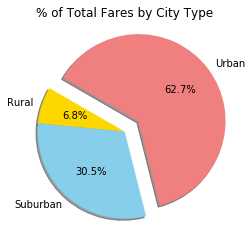

In [4]:
# Calculate Type Percents
fare_by_type_df = city_ride_data.groupby('type')['fare'].sum().to_frame().reset_index()
area_type = fare_by_type_df ['type']
fare = fare_by_type_df ['fare']
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0,0,0.2)
# Build Pie Chart
plt.axis()
plt.pie(fare, explode = explode, labels = area_type, colors = colors, shadow=True, autopct='%1.1f%%', startangle=150)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('Pyber2.pdf', dpi=2000, bbox_inches = 'tight')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

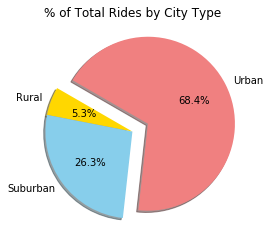

In [6]:
# Calculate Ride Percents
ride_by_type_df = city_ride_data.groupby('type')['ride_id'].count().to_frame().reset_index()
ride_area_type = ride_by_type_df ['type']
ride = ride_by_type_df ['ride_id']
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0,0,0.2)
# Build Pie Chart
plt.pie(ride, explode = explode, labels = ride_area_type, colors = colors, shadow=True, autopct='%1.1f%%', startangle=150)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('Pyber3.pdf', dpi=2000, bbox_inches = 'tight')



In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

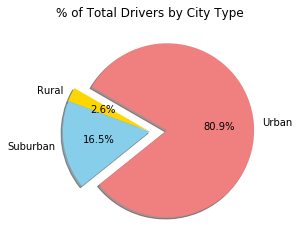

In [8]:
# Calculate Driver Percents
driver_by_type_df = city_data.groupby('type')['driver_count'].sum().to_frame().reset_index()
driver_area_type = driver_by_type_df ['type']
driver = driver_by_type_df ['driver_count']
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0,0,0.2)
# Build Pie Chart
plt.pie(driver, explode = explode, labels = driver_area_type, colors = colors, shadow=True, autopct='%1.1f%%', startangle=150)
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig('Pyber4.pdf', dpi=2000, bbox_inches = 'tight')


In [9]:
# Show Figure
plt.show()